# DSCI 100 Final Project: Group 10  

Members: 

Liam Woo (45648557), Daniel Shibary (36650380), Miranda Currie (75065128), Anya Jones (86102779)

# Introduction #

### Background Information:

Data was collected from a study done by the Pacific Laboratory for Artificial Intelligence (PLAI), a computer science research group led by Dr. Frank Wood. Their current project involves the creation of an embodied AI model can receive, understand, and respond to a complex environment, similar to how humans interact with the world around them.

To do so, the popular game: "Minecraft" was chosen as the "complex environment". Behavioural data, such as locations visited, what players said in chat, in game actions, etc. were taken from players of the "PLAIcraft" server, a free Minecraft server run by PLAI, in order to study the trends and patterns of how players interact with the virtual world. This data will then be used to train and develop the AI model.

Information from the players.csv dataset was retrieved primarily during the signup process of each player with the rest coming from their actual play in the server.

### Question:

We wanted to answer the question on which "kinds" of players are most likely to contribute a large amount of data so that these players can be targeted during recruiting efforts. This lead to the question: **can a players age, experience, subscription status, and gender be used to determine a players total number of hours?**

### Dataset Description:
##### Below is a summary of the players.csv dataset, including the number of observations, number of variables, variable names and their correpsonding, data type, possible values, and description.

<br>

| Observations(rows): | Variables(columns): |
|---------------------------|-----------|
|    196    |    7    |

<br>

|Variable:|Data type:|Possible Values:|Desciption:|
|:----|:----|:----|:----|
| experience | character (chr) | Beginner, Amateur, Regular, Veteran, Pro | The self-declared skill level of the player |
| subscribe | logical (lgl) | TRUE, FALSE | Whether or not the player is subscribed |
| hashedEmail | character (chr) | N/A | A unique sequence of numbers and letters providing a secure way to represent a players E-mail |
| played_hours | double (dbl) | N/A | The number of hours a player has put into the server |
| name | character (chr) | N/A | The name of the player |
| gender | character (chr) | Male, Female, Non-binary, Two-Spirited, Prefer not to say, Other, Agender | Gender of the player |
| Age | double (dbl) | N/A | Age of the player |

<br>

##### Below is the summary statistics of the players.csv dataset (mean, median, maximum, and minimum values of each variable), which were computed using the summarize function. (corresponding code in the "Methods" section, Step 2)

<br>

| Category                  | Count      |
|---------------------------|-----------|
| Total Players             | 196       |
| Minimum Age               | 9         |
| Maximum Age               | 58        |
| Average Age               | 21.14     |
| Median Age                | 19        |
| Minimum Played Hours      | 0         |
| Maximum Played Hours      | 223.1     |
| Median Played Hours       | 0.1       |
| Average Played Hours      | 5.85      |
| Subscribed Players        | 144       |
| Regular Players           | 36        |
| Veteran Players           | 48        |
| Pro Players               | 14        |
| Male Players              | 124       |
| Female Players            | 37        |
| Non-binary Players        | 15        |
| Two-Spirited Players      | 6         |
| Other Gender Players      | 1         |
| Agender Players           | 2         |
| Prefer Not to Say         | 11        |

<br>

### Possible Issues:

Within the players.csv dataset there are few issues. These include `NA` values in the `Age` column as well as the `gender` and `experience` values being categorical variables. To fix the former, simple data wrangling removing `NA` values out of age would be beneficial. The latter issue requires a bit more involvement, the use of "dummy variables" seems like a valid option in order to predict numerical values off of categorical variables. Additionally, there is alot of players who did not play at all , this may skew the data towards values closer to 0.

## Methods

In order to determine if the player's age, experience level, subscription status, and gender can be used to predict the number of hours they play, and thus the amount of data they will provide to the research, we will first explore the relationships of each of the variables with played_hours via visualisation to see what characteristics are correlated to high playtimes and their individual relavance. In addition a foward selection of a knn regression model will be done to quantify the relavancy via rmse value. The rmse value will then be compared to the mean `played_hours` value to determine whether or not age, experience level, and subscription status can predict played_hours well.

**Why is this method appropriate?**

This method would be appropriate as it is a exploratory type of question. This form of question investigates possible relationships within a dataset. An example of this would be to determine if the size, shape, colour, etc. Of a tumor is relevant to the type of cancer it came from. In regards to answering the exact question stated previously, exploratory visualisation will allow the finding of trends and patterns within the data as well as showing visual relavancy. While the forward selection can give us the validity of said patterns seen in the exploratory visualisations. Which can be compared to form a final conclusion.

**What are the potential limitations or weaknesses of the method selected?**

The main limitation of this method is the small size of the dataset causing forward selection to give poor results, as the repeated training of models on the same dataset increases the likelihood of running into a high cross-validation accuracy/rmse estimate with a low true accuracy/rmse estimate on the test data.

**How are you going to compare and select the model?**

So far, we have learned knn and linear regression as classification techniques/models. Linear regression is used to predict values from a known linear relationship, meanwhile knn is used to predict values with a non-linear relationship. In this case the `hours_played` and the associated predictor variables all lack a linear relationship thus knn regression will be selected for use in the forward selection.

**How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?**

Data will be first split into training and testing sets with a 75-25 split as the dataset only contains 196 observations. The model will be made or trained using the training sets. Within the training sets, cross validation will be used with a 5 folds as the smaller dataset to lower variance in rmse estimates.

### Step 1: Loading in data

To begin, the relavant libraries and .csv file: `players.csv` must be loaded in using `library` and `read_csv`
`players.csv` will be assigned to `players_csv`

In [129]:
#------------------------------ STEP 1 ------------------------------#

# Needed libraries:
library(tidyverse)
library(dplyr)
library(tidyr)
library(recipes)
library(tidymodels)
library(RColorBrewer)

# Making it so that only 6 rows of a table are printed for clarity
options(repr.matrix.max.rows = 6)

# Reading in players.csv
players_csv <- read_csv('https://raw.githubusercontent.com/wolfgirl43/DSCI-Group-10-Final-Project-/refs/heads/main/players.csv')


#players_csv
#uncomment the aboove line to print players_csv

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Step 2: Summary Statistics

The following cell corresponds to the code used to find the summary statistics seen in the **Introduction** section.
<br>
For numerical values, the minimum, median, max, and mean values were found. For categorical variables, the counts (e.g the number of subscribed players in the dataset) were found.
<br>
These were all placed in a table (seen in the **Introduction** section)

In [5]:
#------------------------------ STEP 2 ------------------------------#

summary_table<- players_csv|>
    summarize(
        Rows= n(), 
        Columns= ncol(players_csv),
        total_players = n(),
        
# Age variable
        min_age = min(Age, na.rm = TRUE),
        max_age = max(Age, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE),
        med_age = median(Age, na.rm = TRUE),
        
# played_hours variable
        min_pt = min(played_hours, na.rm = TRUE),
        max_pt = max(played_hours, na.rm = TRUE),
        med_pt = median(played_hours, na.rm = TRUE),
        mean_pt = mean(played_hours, na.rm = TRUE),

# subscribe variable
        num_subscribed = sum(subscribe == TRUE, na.rm=TRUE),
        num_unsubscribed = sum(subscribe ==FALSE, na.rm=TRUE),

# experience variable
        num_Beginner = sum(experience == "Beginner", na.rm = TRUE),
        num_Amateur = sum(experience == "Amateur", na.rm = TRUE),
        num_Regular = sum(experience == "Regular", na.rm = TRUE),
        num_Veteran = sum(experience == "Veteran", na.rm = TRUE),
        num_Pro = sum(experience == "Pro", na.rm = TRUE),

# gender variable
        num_Male = sum(gender == "Male", na.rm = TRUE),
        num_Female = sum(gender == "Female", na.rm = TRUE),
        num_NonBinary = sum(gender == "Non-binary", na.rm = TRUE),
        num_TS = sum(gender == "Two-Spirited", na.rm = TRUE),
        num_Other = sum(gender == "Other", na.rm = TRUE),
        num_Ag = sum(gender == "Agender", na.rm = TRUE),
        num_pns = sum(gender == "Prefer not to say", na.rm = TRUE))


#summary_table
# uncomment the above line to print the table.

### Step 2.1: Visualisation of Summary Statistics

<pr>The following cell contains the code to print the following visulisations:<pr>

<pr> Using players_csv<pr>:
* Distribution of Age (fig. 2.1.1)
* Distribution of played_hours (fig. 2.1.2)
* Distribution of subscribe (fig. 2.1.3)
* Distribution of experience (fig. 2.1.4)
* Distribution of gender (fig. 2.1.5)

In [131]:
#----------------------------- STEP 2.1 -----------------------------#

#fig. 2.1.1 (Distribution of player's age)
age_vis <- players_csv |>
    select(Age) |>
    ggplot(aes(x = Age)) +
        geom_histogram(na.rm = TRUE, binwidth = 0.5) +
        theme(text = element_text(size = 15),
              plot.title = element_text(size = 15, hjust = 0.5),
              axis.title.x = element_text(size = 12, vjust = -0.5),
              axis.title.y = element_text(size = 12, vjust = 0.7)) +
        labs(x = 'Age (Years)',
             y = 'Number of Players',
             title = "Fig. 2.1.1 Distribution of Player's Ages")

#fig 2.1.2 (Distribution of total hours players played)
pt_vis <- players_csv |>
    select(played_hours) |>
    filter(played_hours > 0) |>
    ggplot(aes(x = played_hours)) +
        geom_histogram(binwidth = 0.3) +
        theme(text = element_text(size = 15),
              plot.title = element_text(size = 15, hjust = 0.5),
              axis.title.x = element_text(size = 12, vjust = -0.5),
              axis.title.y = element_text(size = 12, vjust = 0.7)) +
        labs(x = 'Total Hours Played',
             y = 'Number of Players',
             title = "Fig 2.1.2 Distribution of Total Hours Players Played") + 
        scale_x_log10()

#fig 2.1.3 (Distribution of player's subscription status)
sub_vis <- players_csv |>
    select(subscribe) |>
    ggplot(aes(x = subscribe,
               fill = subscribe)) +
        geom_bar() +
        scale_fill_brewer(palette = 'Dark2') +
        theme(legend.position = 'none',
              text = element_text(size = 15),
              plot.title = element_text(size = 15, hjust = 0.5),
              axis.title.x = element_text(size = 12, vjust = -0.5),
              axis.title.y = element_text(size = 12, vjust = 0.7)) +
        labs(x = 'Player Subscription Status',
             y = 'Number of Players',
             title = "Fig 2.1.3 Distribution of player's subscription status")

#fig 2.1.4 (Distribution of the experience levels of players)
exp_vis <- players_csv |>
    select(experience) |>
    ggplot(aes(x = experience,
               fill = experience)) +
        geom_bar() +
        scale_fill_brewer(palette = 'Dark2') +
        theme(legend.position = 'none',
              text = element_text(size = 15),
              plot.title = element_text(size = 15, hjust = 0.5),
              axis.title.x = element_text(size = 12, vjust = -0.5),
              axis.title.y = element_text(size = 12, vjust = 0.7)) +
        labs(x = 'Player Experience Level',
             y = 'Number of Players',
             title = 'Fig 2.1.4 Distribution of Player Skill Level')

#fig 2.1.5 (Distribution of player's gender)
gen_vis <- players_csv |>
    select(gender) |>
    mutate(gender = fct_recode(gender,
                               'PNTS' = 'Prefer not to say')) |>
    ggplot(aes(x = gender,
               fill = gender)) +
        geom_bar() +
        scale_fill_brewer(palette = 'Dark2') +
        theme(legend.position = 'none',
              text = element_text(size = 15),
              plot.title = element_text(size = 15, hjust = 0.5),
              axis.title.x = element_text(size = 12, vjust = -0.5),
              axis.title.y = element_text(size = 12, vjust = 0.7)) +
        labs(x = "Player's Gender",
             y = 'Number of Players',
             title = "Fig 2.1.5 Distribution of player's gender")


#age_vis
# uncomment the above line to print the Fig. 2.1.1
#pt_vis
# uncomment the above line to print the Fig. 2.1.2
#sub_vis
# uncomment the above line to print the Fig. 2.1.3
#exp_vis
# uncomment the above line to print the Fig. 2.1.4
#gen_vis
# uncomment the above line to print the Fig. 2.1.5

### Step 3: Wrangling Data

The following cell wrangles the `player_csv` dataset in order to tidy it for further analysis.
<br>
As stated in the **Potential Issues** section of the **Introduction**:

<pr>1 datasets from `players_csv` will be made:<pr>
1. `players_tidy`
<br>

<pr>`players_tidy` will be `players_csv` with the `NA` values in the age column removed.<pr>

<pr>This dataset will address the issue of the `NA` values in the `Age` column<pr>

<pr>Dummy variables will be used in the recipe via `step_dummy` as it makes the code more streamlined rather than inputting them in manually.<pr>

<pr>Additionally, irrelevant variables to this analysis (name and hashed_email) will be removed and the `gender` value "Prefer not to say" will be replaced with "PNTS" to fit on visualisations cleaner<pr>

In [133]:
#------------------------------ STEP 3 ------------------------------#

# create players_tidy
players_tidy <- players_csv |>
    select(-name) |>#, -hashedEmail) |>
    mutate(gender = fct_recode(gender, 'PNTS' = 'Prefer not to say')) |>
    filter(Age != 'NA')


#players_tidy
# uncomment the above line to print players_tidy_zero_in

### Step 4.1: Data Analysis (Visualisation Relationship)

<pr> To begin, relationships between the possible predictors (`Age`, `gender`, `experience`, `subscribe`) and `played_hours` will be determined via visualisation.<pr>

<pr> The visualisations are as follows: <pr>

<pr> using `players_tidy`:<pr>
* `played_hours` and `Age` relationship (fig. 4.1.1)
* `played_hours` and `gender` relationship (fig. 4.1.2)
* `played_hours` and `experience` relationship (fig. 4.1.3)
* `played_hours` and `subscribe` relationship (fig. 4.1.4)

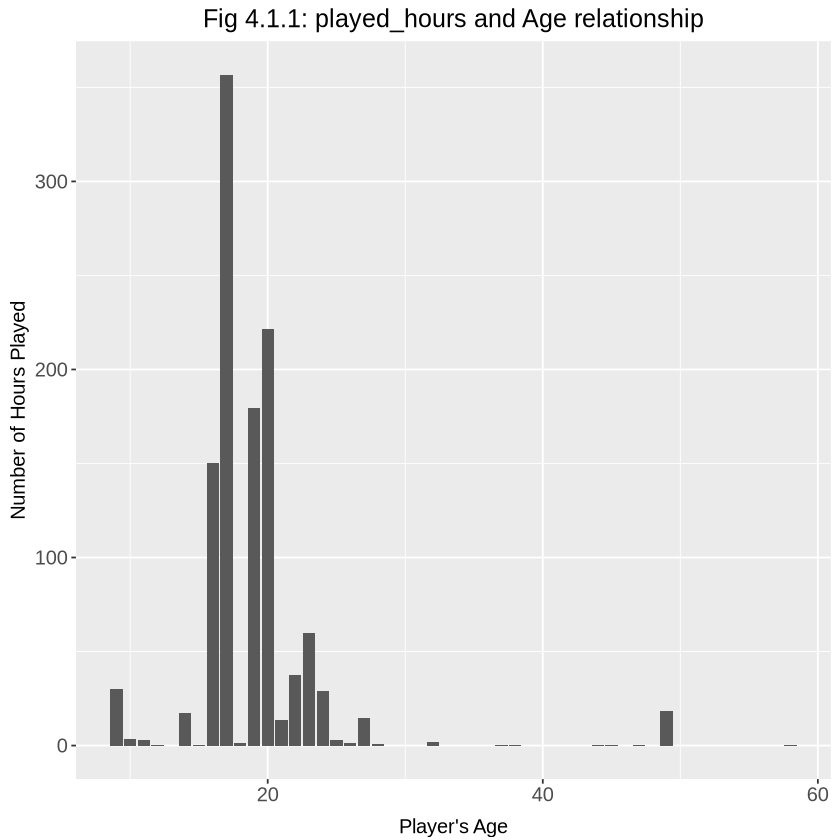

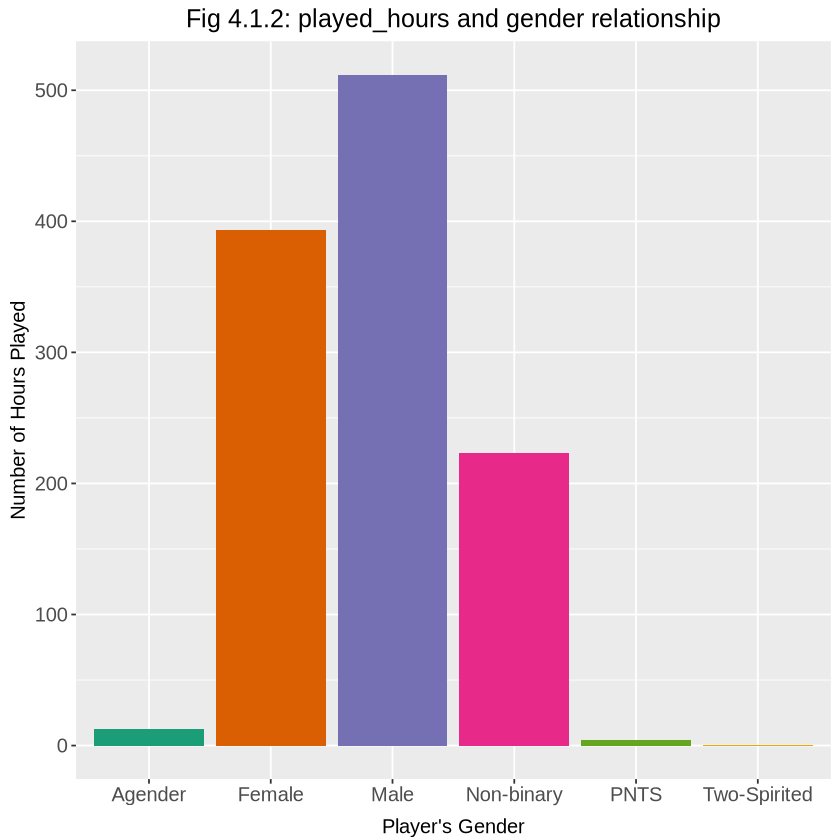

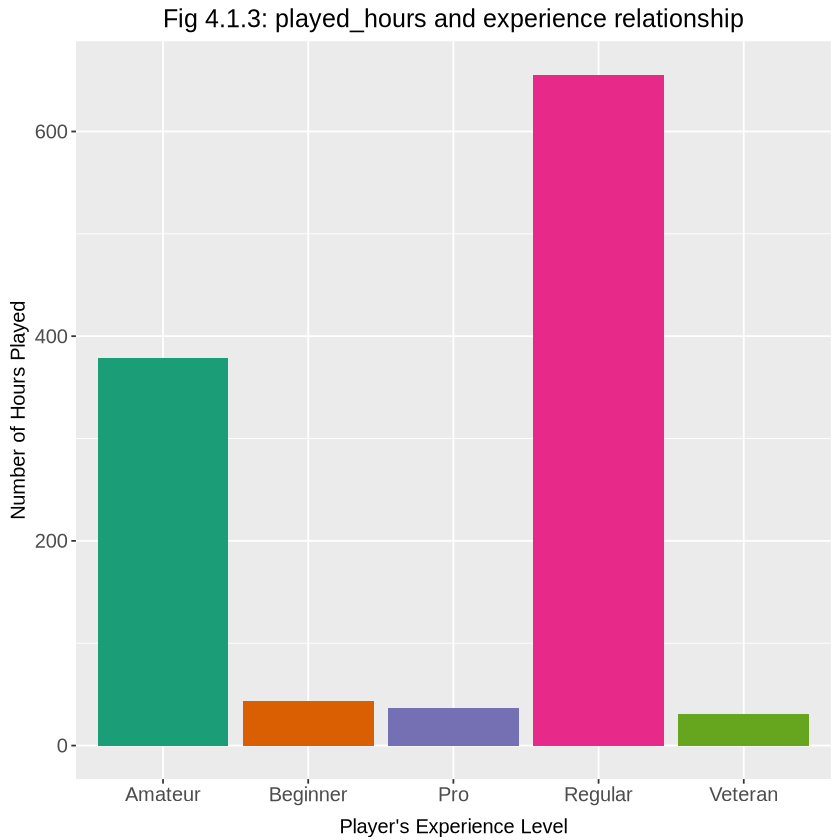

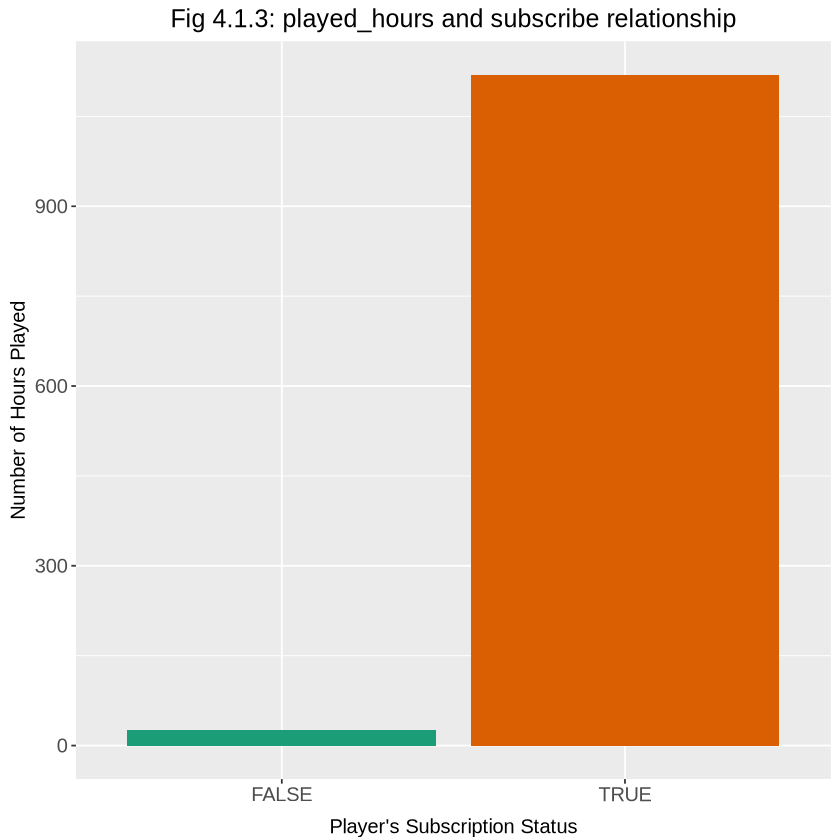

In [134]:
#----------------------------- STEP 4.1 -----------------------------#

# Fig 4.1.1 played_hours and Age relationship
pt_vs_Age_vis <- players_tidy |>
    ggplot(aes(x = Age,
               y = played_hours)) +
        geom_bar(stat = 'identity') +
        theme(text = element_text(size = 15),
              plot.title = element_text(size = 15, hjust = 0.5),
              axis.title.x = element_text(size = 12, vjust = -0.5),
              axis.title.y = element_text(size = 12, vjust = 0.7)) +
        labs(x = "Player's Age",
             y = 'Number of Hours Played',
             title = "Fig 4.1.1: played_hours and Age relationship")

# Fig 4.1.2 played_hours and gender relationship
pt_vs_gen_vis <- players_tidy |>
    ggplot(aes(x = gender,
               y = played_hours,
               fill = gender)) +
        geom_bar(stat = 'identity') +
        scale_fill_brewer(palette = 'Dark2') +
        theme(legend.position = 'none',
              text = element_text(size = 15),
              plot.title = element_text(size = 15, hjust = 0.5),
              axis.title.x = element_text(size = 12, vjust = -0.5),
              axis.title.y = element_text(size = 12, vjust = 0.7)) +        
        labs(x = "Player's Gender",
             y = 'Number of Hours Played',
             title = "Fig 4.1.2: played_hours and gender relationship")

# Fig 4.1.3 played_hours and experience relationship
pt_vs_exp_vis <- players_tidy |>
    ggplot(aes(x = experience,
               y = played_hours,
               fill = experience)) +
        geom_bar(stat = 'identity') +
        scale_fill_brewer(palette = 'Dark2') +
        theme(legend.position = 'none',
              text = element_text(size = 15),
              plot.title = element_text(size = 15, hjust = 0.5),
              axis.title.x = element_text(size = 12, vjust = -0.5),
              axis.title.y = element_text(size = 12, vjust = 0.7)) +
        labs(x = "Player's Experience Level",
             y = 'Number of Hours Played',
             title = "Fig 4.1.3: played_hours and experience relationship")

# Fig 4.1.4 played_hours and subscribe relationship
pt_vs_sub_vis <- players_tidy |>
    ggplot(aes(x = subscribe,
               y = played_hours,
               fill = subscribe)) +
        geom_bar(stat = 'identity') +
        scale_fill_brewer(palette = 'Dark2') +
        theme(legend.position = 'none',
              text = element_text(size = 15),
              plot.title = element_text(size = 15, hjust = 0.5),
              axis.title.x = element_text(size = 12, vjust = -0.5),
              axis.title.y = element_text(size = 12, vjust = 0.7)) +
        labs(x = "Player's Subscription Status",
             y = 'Number of Hours Played',
             title = "Fig 4.1.3: played_hours and subscribe relationship")


pt_vs_Age_vis
# uncomment the above line to print the Fig. 4.1.1
pt_vs_gen_vis
# uncomment the above line to print the Fig. 4.1.2
pt_vs_exp_vis
# uncomment the above line to print the Fig. 4.1.3
pt_vs_sub_vis
# uncomment the above line to print the Fig. 4.1.4

### Step 4.2: Data Analysis (Forward Selection)

<pr>Forward selection will be done to quantify the relavancy of predictors<pr>

<pr>Below contains the code for:<pr>

* Table containing the predictors and their relavant rmse
* Visualisation of the rmse values and the # of predictors (Fig. 4.2.1)

In [137]:
#----------------------------- STEP 4.2 -----------------------------#

# Split players_tidy into training and testing sets:
players_split <- players_tidy |>
    initial_split(prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

# create tbl containing all the predictors
possible_predictors <- colnames(players_training |> select(Age, gender, experience, subscribe))

# Finding most meaningful predictors

# create an empty tibble to store the results
accuracies <- tibble(size = integer(),
                     model_string = character(),
                     rmse = numeric())

# create a model specification
players_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |>
    set_engine('kknn') |>
    set_mode("regression")

# create a 5-fold cross-validation object
players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)

# store the total number of predictors
n_total <- length(possible_predictors)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    
# for every predictor still not added yet
accs <- list()
models <- list()
for (j in 1:length(possible_predictors)) {
        
# create a model string for this combination of predictors
preds_new <- c(selected, possible_predictors[[j]])
model_string <- paste('played_hours', "~", paste(preds_new, collapse="+"))

# create a recipe from the model string
players_recipe <- recipe(as.formula(model_string), data = players_training)
    
# tune model
acc <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    tune_grid(resamples = players_vfold, grid = 10) |>
    collect_metrics() |>
    filter(.metric == 'rmse') |>
    summarize(mx = min(mean))
    acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.min(unlist(accs))
    accuracies <- accuracies |>
      add_row(size = i,
              model_string = models[[jstar]],
              rmse = accs[[jstar]])
    selected <- c(selected, possible_predictors[[jstar]])
    possible_predictors <- possible_predictors[-jstar]
}

# Fig 4.2.1 rmse_plot
rmse_plot <- accuracies |>
    ggplot(aes(x = size,
               y = rmse)) +
        geom_point() +
        geom_line() +
    theme(text = element_text(size = 15),
          plot.title = element_text(size = 15, hjust = 0.5),
          axis.title.x = element_text(size = 12, vjust = -0.5),
          axis.title.y = element_text(size = 12, vjust = 0.7)) +
        labs(x = "Number of Predictors",
             y = "RMSE",
             title = "Fig 4.2.1: Effect of the number of predictors on RMSE")

#accuracies
# uncomment line above to print the results of the forward selection
#rmse_plot
# uncomment line above to print Fig. 4.2.1

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x1



→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x4





# Discussion #

<pr> The goal of this analysis was to determine the relavancy of `Age`, `experience`, `gender`, and `subscribe` in predicting `played_hours`.<pr>

<pr> In **Step 4.1** visualisations of each predictor and its relationship to `played_hours` were made.<pr>

* Fig. 4.1.1 (`played_hours` and `Age`) we can conclude, due to the peaks and significant changes in the number of hours played at different ages, that the age of a player **is** relavant to predicting the number of hours they may play.

* Fig. 4.1.2 (`played_hours` and `gender`) we can conclude, due to the peaks seen in the visualisation showing significant changes in the number of hours played depending on the player's gender (Male, Female, Non-binary, Two-Spirited, Prefer not to say, Other, Agender), that the declared gender of a player **is** relavant to predicting the number of hours they may play.

* Fig. 4.1.3 (`played_hours` and `experience`) we can conclude, due to the peaks and significant changes in the number of hours played depending on the player's experience level (pro, veteran, regular, amateur, and beginner), that the experience of a player **is** relavant to predicting the number of hours they may play.

* Fig. 4.1.4 (`played_hours` and `subscribe`) we can conclude, due to the peaks seen in the visualisation showing significant changes in the number of hours played, that whether or not a player is subscribed to a game-related news letter **is** relavant to predicting the number of hours they may play.

<pr> In **Step 4.2** forward selection was used with the same goal as the visualisations in **Step 4.1**. The relavant rmse values were as follows:

<br>

| Size | Predictor Combination | rmse |
|------|-----------------------|------|
| 1	| played_hours ~ experience	| 15.15036 |
| 2	| played_hours ~ experience+subscribe |	15.14435 |
| 3	| played_hours ~ experience+subscribe+gender | 16.43838 |
| 4	| played_hours ~ experience+subscribe+gender+Age | 18.05425 |
<br>

<pr> Forward selection works by choosing a starting predictor, recording the rmse value, then adding another, recording the rmse value, then repeating this until all predictors are accounted for. Knowing this, we can infer that a increase in rmse resulted in poorer accuracy thus making the predictor irrelvant.<pr>

<pr> Using this knowledge and the table above, we can find that `experience` and `subscribe` are relavant, lowering rmse upon their addition. On the contrary, `Age` and `gender` seem to increase rmse and are thus irrelvant. <pr>

<pr> We are now getting contradictory information between the two methods of determining predictor relevance, which one is better representing the true relavancy of the predictors?<pr>

<pr> It is most likely the visualisations seen in **Step 4.1**. This is because, as stated previously, forward selection requires a large data set in order to avoid increased chance of randomly getting a model with a high cross validation accuracy/rmse and low true accuracy/rmse which will skew the resultant values. However players_csv is already a small dataset with only 196 observations increasing the likelihood that the problem stated before occurs, this is also further exascerbated by the use of training sets which decreased the size of the players_csv dataset even more.<pr>

<pr> These results were mot expected from the forward selection as the visualisations showed significant relevancy for each possible predictor <pr>

<pr> Returning to the original question of if a players age, experience, subscription status, and gender be used to determine a players total number of hours? The answer is yes, all variables have some relevancy in determining the hours they may play.<pr>

<pr> Further ideas for this exploratory analysis include, attempting the forward selection again in attempts to confirm the findings seen in the visualisations, and using the information regarding the relavancy of predictors to do predictive work on what players should be tragetted for recruitment.

# Refrences #

Pacific Laboratory for artificial intelligence. Pacific Laboratory for Artificial Intelligence. (2025, September 11). https://plai.cs.ubc.ca/

Pacific Laboratory of Artificial Intelligence. (2025). Plaicraft. PLAICraft. https://plaicraft.ai/

The University of British Columbia. Dr. Frank Wood. (n.d.). https://www.cs.ubc.ca/~fwood 

Mike, & User. (2021, December 22). Jupyter Notebook markdown cheatsheet. SqlBak Blog. https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet

Tiffany Timbers, T. C. (2024, August 21). Data science. Chapter 6 Classification II: evaluation & tuning. https://datasciencebook.ca/classification2.html#forward-selection-in-r 